In [2]:

#We are going to use a dataset downloaded from the Dutch Central bureau for Statistics, in combination with data from VNG(Dutch municipalities). The number of records is 420, which is the number of municipalities. For each we the following variables: name of the mayor, gender and political party, average income, WOZ (tax value of house), number of unemployed persons, number of cars.
#We start with  downloading the data set(.dbf or xls) into R. 

#Before we start with the data, check your workdirectory:
getwd()
#Or set your working directory with
#setwd()

#For loading xls data we use the library gdata.

setwd("/home/peter/Documents/Documenten_win10/R/r_exercise/R/R_for_journalists_handout")
require("gdata")
gemeente <- read.xls("gemeentedata0.xls")      

[1] "/home/peter/Documents/Documenten_win10/R/r_exercise/R/R_for_journalists_handout"

Loading required package: gdata
gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.

gdata: read.xls support for 'XLSX' (Excel 2007+) files ENABLED.

Attaching package: ‘gdata’

The following object is masked from ‘package:stats’:

    nobs

The following object is masked from ‘package:utils’:

    object.size

The following object is masked from ‘package:base’:

    startsWith



In [3]:
#We can check wheter the data have been loaded

ls()

#We can also do a first inspection of the data looking at the dimensions:

dim(gemeente)

#And look at the structure:

str(gemeente)


[1] "b"              "base"           "dat"            "gemeente"      
 [5] "latitude"       "longitude"      "maptype"        "newEntry"      
 [9] "politie1"       "politie2"       "politiescraper" "politieurl"    
[13] "results"        "suffix"         "target"         "url"           
[17] "urls"           "var"            "zoom"

[1] 415  10

'data.frame':	415 obs. of  10 variables:
 $ ID          : int  0 1 2 3 4 5 6 7 8 9 ...
 $ GEMEENTE    : Factor w/ 415 levels "Aa en Hunze",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ BEVOLKING   : num  25721 12746 30446 27299 28070 ...
 $ GESLACHT    : Factor w/ 2 levels "m","v": 1 1 1 1 1 1 1 1 1 2 ...
 $ BURGEMEESTER: Factor w/ 413 levels "Aaltina Evenhuis-Meppelink",..: 95 102 337 51 335 52 159 336 230 23 ...
 $ PARTIJ      : Factor w/ 7 levels "CDA","CU","D66",..: 5 1 7 1 2 5 7 1 7 7 ...
 $ GEM_INKOMEN : num  13400 12500 14700 11900 11400 12300 15100 13200 11900 12500 ...
 $ GEM_WOZ     : num  255000 277000 301000 223000 196000 217000 277000 196000 161000 194000 ...
 $ WW_PER_100  : num  19 10 12 17 21 11 11 14 23 18 ...
 $ AUTOBEZIT   : num  488 470 499 460 448 ...


In [4]:
#Univariate Analysis
#We are now going to look at the statistical characteristics of **one variable** at the time. First an overvieuw of different measures.

summary(gemeente)

       ID                 GEMEENTE     BEVOLKING      GESLACHT
 Min.   :  0.0   Aa en Hunze  :  1   Min.   :   930   m:328   
 1st Qu.:103.5   Aalburg      :  1   1st Qu.: 15818   v: 87   
 Median :207.0   Aalsmeer     :  1   Median : 25406           
 Mean   :207.0   Aalten       :  1   Mean   : 40276           
 3rd Qu.:310.5   Achtkarspelen:  1   3rd Qu.: 41750           
 Max.   :414.0   Alblasserdam :  1   Max.   :789846           
                 (Other)      :409                            
                     BURGEMEESTER     PARTIJ     GEM_INKOMEN   
 Willem Gradisen           :  2   CDA    :142   Min.   :    0  
 Wim Dijkstra              :  2   PvdA   :108   1st Qu.:12500  
 Aaltina Evenhuis-Meppelink:  1   VVD    :108   Median :13100  
 Aart-Jan_Moerkerke        :  1   D66    : 23   Mean   :13168  
 Aat de Jonge              :  1   CU     : 11   3rd Qu.:13800  
 Ab Meijerman              :  1   (Other): 16   Max.   :26500  
 (Other)                   :407   NA's   :  7   

In [5]:
#Interval and Ratio level
#Let's first inspect measures for metric data

mean(gemeente$GEM_INKOME)
max(gemeente$GEM_INKOME)
min(gemeente$GEM_INKOME)
sd(gemeente$GEM_INKOME)
quantile(gemeente$GEM_INKOME)

[1] 13168.43

[1] 26500

[1] 0

[1] 2383.851

0%   25%   50%   75%  100% 
    0 12500 13100 13800 26500

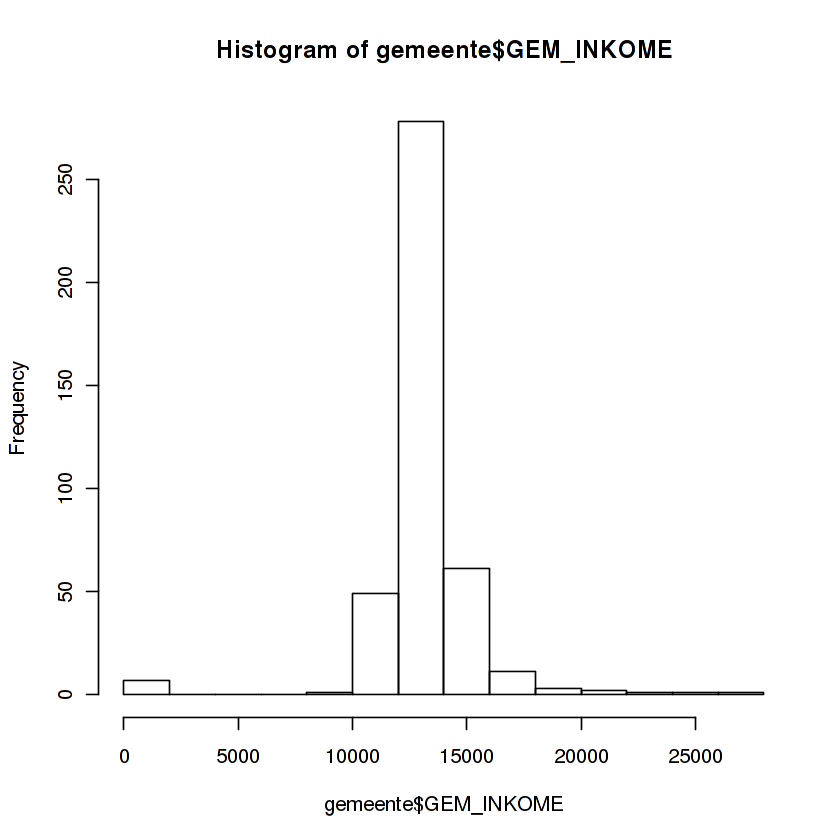

In [6]:
#Now a graph for the income distribution, the histogram:

hist(gemeente$GEM_INKOME)


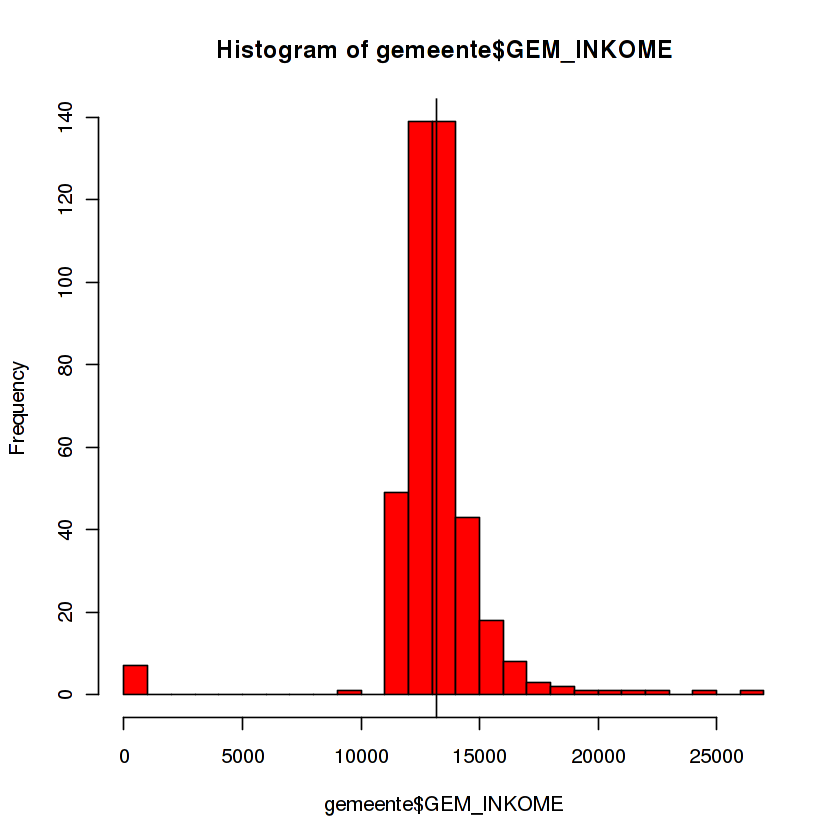

In [7]:
#Let's give it a different colour class with 20 and a line for mean

hist(gemeente$GEM_INKOME, 20, col="red")
abline(v=mean(gemeente$GEM_INKOME, col="blue"))


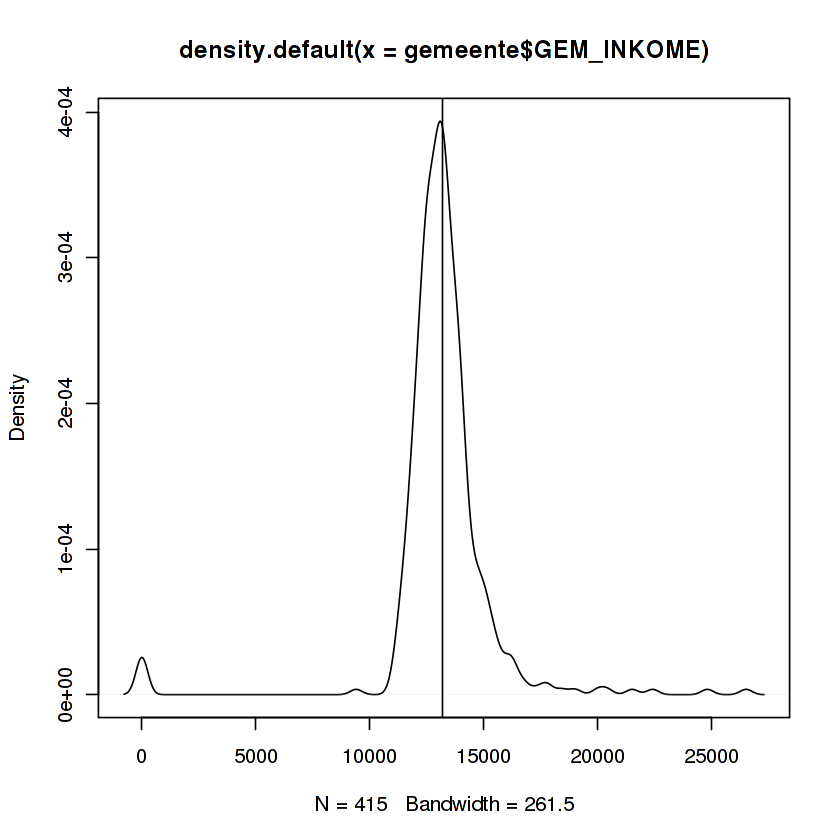

In [8]:
#And some other variations, as continuous variable:

x<-density(gemeente$GEM_INKOME)
plot(x)
abline(v=mean(gemeente$GEM_INKOME, col="blue"))

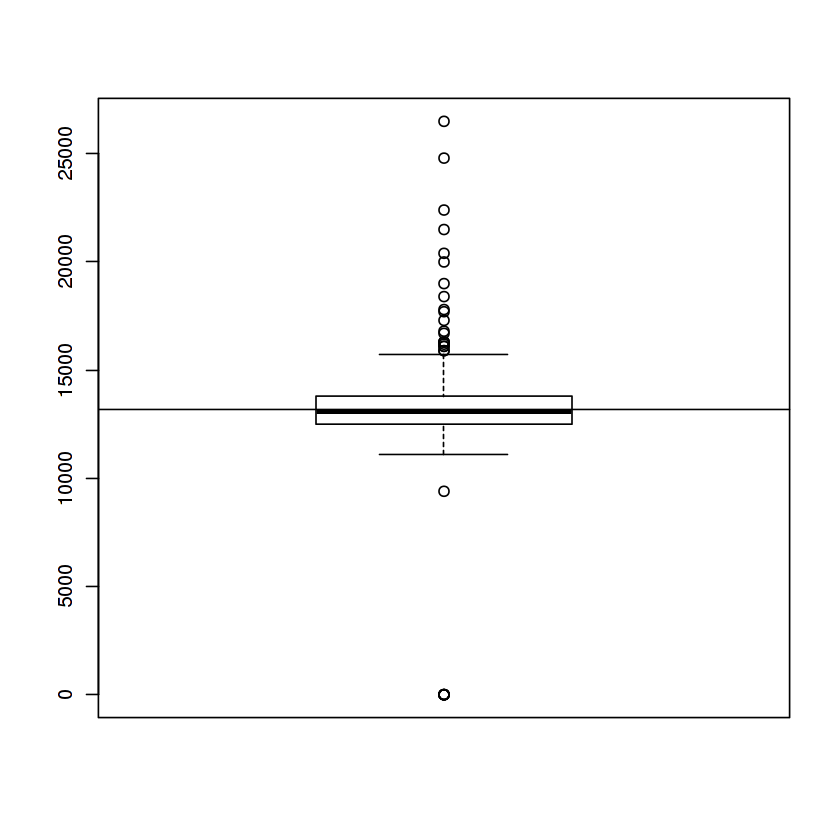

In [9]:
#And now as a box plot:


boxplot(gemeente$GEM_INKOME)
abline(h=mean(gemeente$GEM_INKOME, col="red"))

In [10]:
#Non-Metric variables on Nominal level
#let's look at gender and political party.

gender<-gemeente$GESLACHT
partij<-gemeente$PARTIJ
table(gender)
table(partij)

gender
  m   v 
328  87 

partij
 CDA   CU  D66   GL PvdA  SGP  VVD 
 142   11   23    8  108    8  108 

In [11]:
#But these are absolute number, can we turn them in proportions or percentages:

tg<-table(gender)
prop.table(tg)
tp<-table(partij)
prop.table(tp)


gender
        m         v 
0.7903614 0.2096386 

partij
       CDA         CU        D66         GL       PvdA        SGP        VVD 
0.34803922 0.02696078 0.05637255 0.01960784 0.26470588 0.01960784 0.26470588 

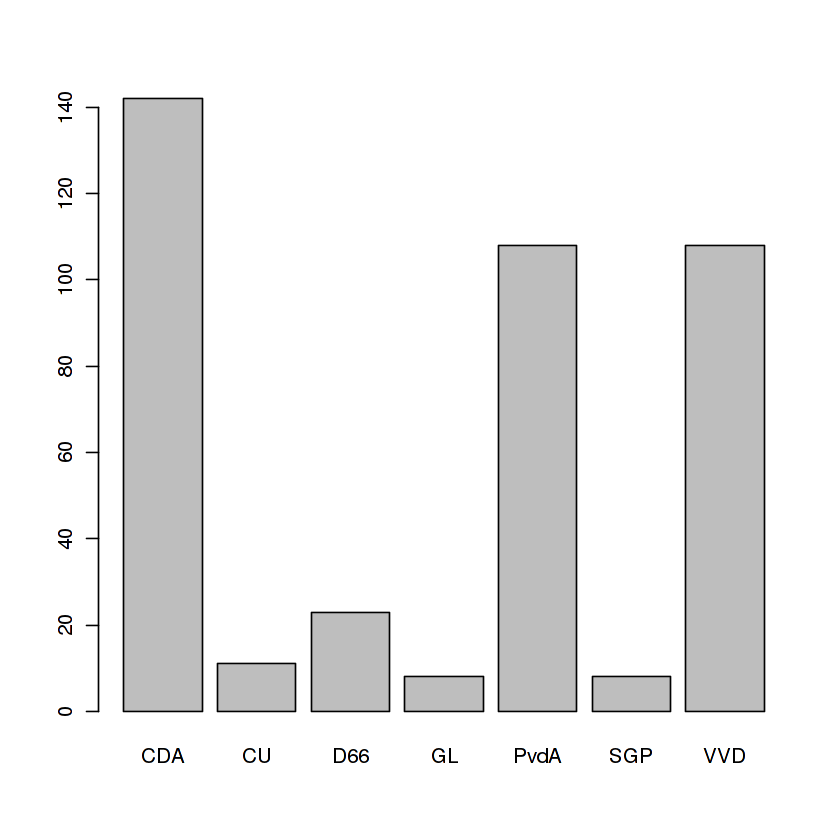

In [12]:
#And a graphic for political party

 plot(partij)

In [13]:
#Making a top-10
#Let's make a list of the ten municipalities with the **highest unemployment**. First we make a new data frame with two variable de name of the municipality(GEMEENTE) and the number of unemployed(WW_PER_100). we make index for this variable and then make a list with decrease. We only want to show the top ten.

gem2<-data.frame(gemeente$GEMEENTE, gemeente$WW_PER_100)
ww <- gemeente$WW_PER_100
index <- with(gem2, order(ww))
gem3<-with(gem2, gem2[order(ww, decreasing=TRUE),])
# cities highest unemployment
head(gem3, 10)
# cities with the lowest unemployment
gem3<-with(gem2, gem2[order(ww, decreasing=FALSE),])
head(gem3, 10)

,gemeente.GEMEENTE,gemeente.WW_PER_100
304,Schiermonnikoog,50
13,Ameland,31
59,Brunssum,31
151,Heerlen,31
180,Kerkrade,30
360,Venlo,30
313,Sittard-Geleen,29
323,Stadskanaal,29
351,Vaals,29
96,Echt-Susteren,28


,gemeente.GEMEENTE,gemeente.WW_PER_100
46,Bodegraven-Reeuwijk,0
102,Eijsden-Margraten,0
167,Hollands Kroon,0
176,Kaag en Braassem,0
178,Kapelle,0
221,Menaldumadeel,0
256,Oldambt,0
277,Peel en Maas,0
329,Stichtse Vecht,0
331,Sudwest-Frysln,0


      gender
partij   m   v
  CDA  118  24
  CU    10   1
  D66   19   4
  GL     4   4
  PvdA  83  25
  SGP    8   0
  VVD   80  28

      gender
partij          m          v
  CDA  0.83098592 0.16901408
  CU   0.90909091 0.09090909
  D66  0.82608696 0.17391304
  GL   0.50000000 0.50000000
  PvdA 0.76851852 0.23148148
  SGP  1.00000000 0.00000000
  VVD  0.74074074 0.25925926

      gender
partij          m          v
  CDA  0.36645963 0.27906977
  CU   0.03105590 0.01162791
  D66  0.05900621 0.04651163
  GL   0.01242236 0.04651163
  PvdA 0.25776398 0.29069767
  SGP  0.02484472 0.00000000
  VVD  0.24844720 0.32558140

CDA   CU  D66   GL PvdA  SGP  VVD 
 142   11   23    8  108    8  108

m   v 
322  86

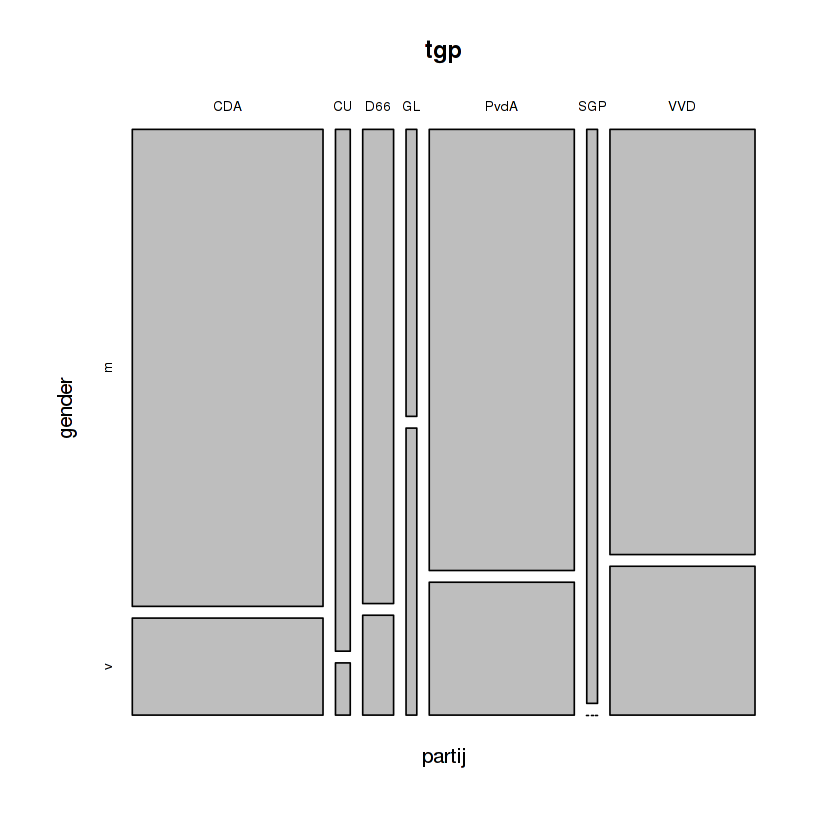

In [14]:
#Bivariate analysis for nominal level
#Let's look at two variables and their relationship.
#The easiets way is to make a **table** of two variable. We try gender and party.

tgp<-table(partij,gender)
tgp
# now as proportions of the row
prop.table(tgp,1)
# as proportions of the column
prop.table(tgp,2)
# and here is the plot
plot(tgp)
# and the row sums
rowSums(tgp)
# and the column sums
colSums(tgp)

In [16]:
#This is enough to calculate the relationship between gender and political party. We calculate **chi-square**:
#$H0$: no relationship between gender and party
#$H1$: gender and party are releted
#The P-Value is 0.101905. The result is not significant at p <     0.05. Chi one side at 5% is 14.1 and 2.5% 16, 
#which higher than Chi observed. Therefore $H0$ is not rejected.
chisq.test(tgp)

Warning message in chisq.test(tgp):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  tgp
X-squared = 10.59, df = 6, p-value = 0.1019


[1] 0.666597

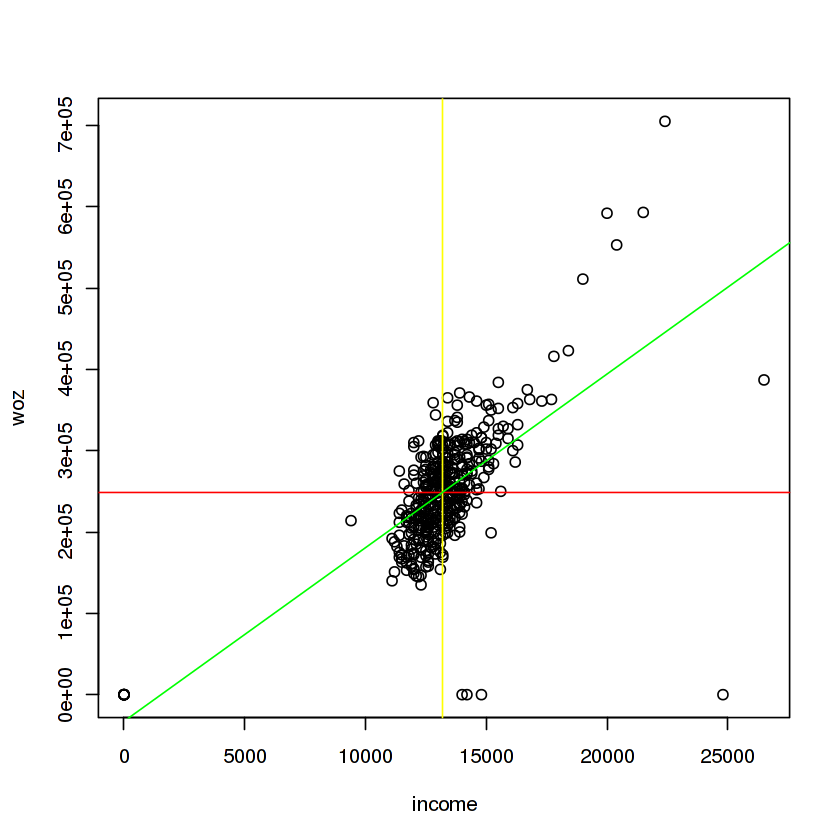

In [17]:
#Bivariate analysis for ration and interval level
#We take a closer look at the relationship between income and woz (house price).

income<-gemeente$GEM_INKOME
woz<-gemeente$GEM_WOZ
# what is the correlation between the two
cor(income,woz)
# next the graphs; two different plots
plot(income,woz)
abline (v=mean(income), col="yellow")
abline(h=mean(woz), col="red")
# and finally the linear model(regression)
fit <-lm(woz~income)
abline(fit, col="green")

Loading required package: lattice


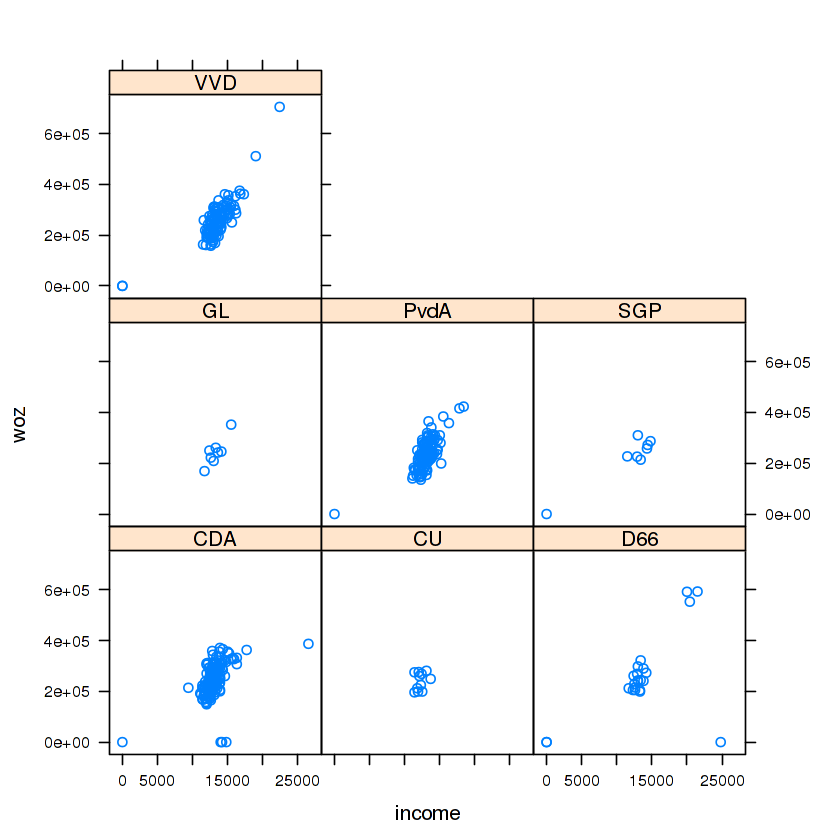

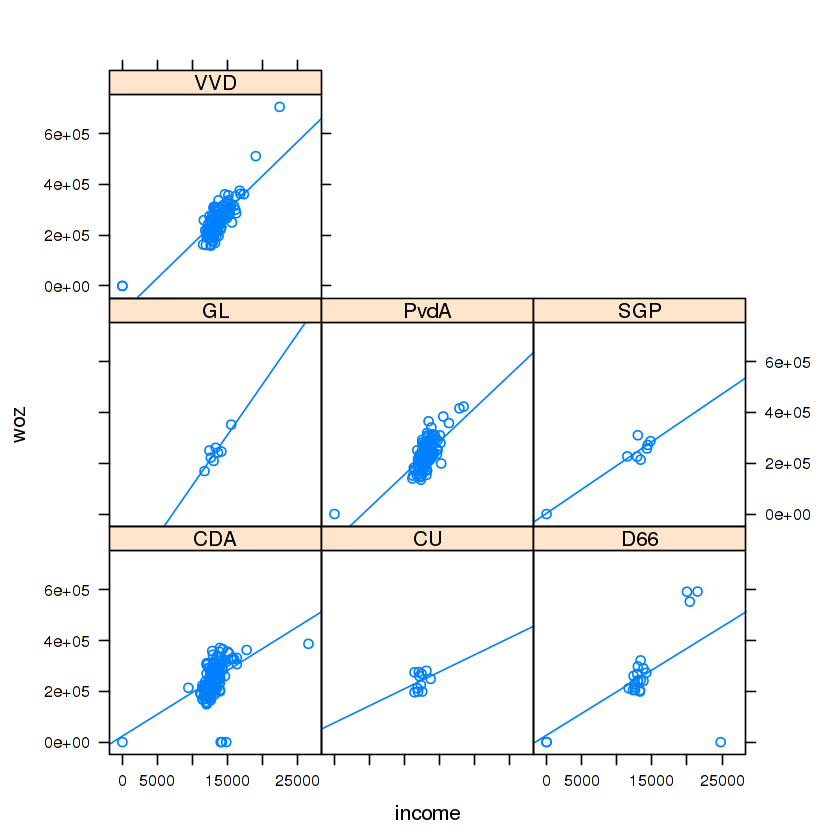

In [18]:
#Let's see how this linear mode and the regression changes for political party

require("lattice")
xyplot(woz~income|partij)
xyplot(woz~income|factor(partij), type=c("p","r"))

Loading required package: ggplot2
`geom_smooth()` using method = 'loess'


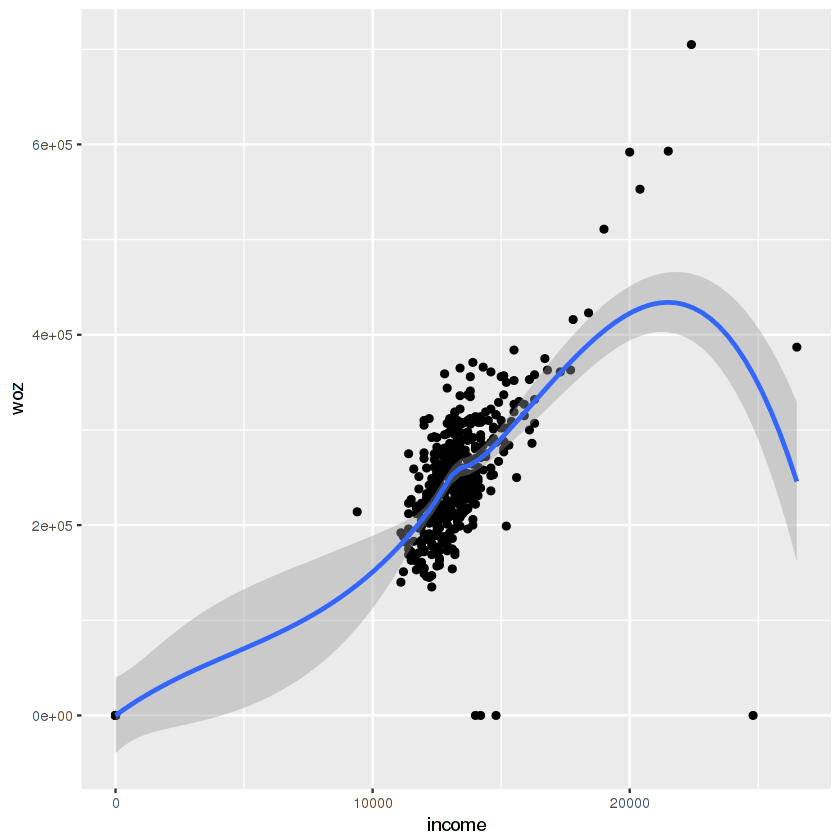

In [19]:
#Finally we make a nicer graph with ggplot.

require("ggplot2")
ggplot(gemeente, aes(x=income, y=woz))+
geom_point() + stat_smooth()

In [20]:
#Creating subsets by recalculating variables

#For small and large
groot<-gemeente[gemeente$BEVOLKING > mean(gemeente$BEVOLKING), c('PARTIJ')]
table(groot)
klein<-gemeente[gemeente$BEVOLKING < mean(gemeente$BEVOLKING), c('PARTIJ')]
table(klein)
#For rich and poor
rijk<-gemeente[gemeente$GEM_INKOME > mean(gemeente$GEM_INKOME), c('PARTIJ')]
arm<-gemeente[gemeente$GEM_INKOME < mean(gemeente$GEM_INKOME), c('PARTIJ')]
table(rijk)
table(arm)

groot
 CDA   CU  D66   GL PvdA  SGP  VVD 
  31    2    7    0   31    3   34 

klein
 CDA   CU  D66   GL PvdA  SGP  VVD 
 111    9   16    8   77    5   74 

rijk
 CDA   CU  D66   GL PvdA  SGP  VVD 
  62    1   11    4   53    4   61 

arm
 CDA   CU  D66   GL PvdA  SGP  VVD 
  80   10   12    4   55    4   47 

In [21]:
#Now that we now how to recalculate variables; we going to make subsets and look at the relationship in the subset-that is calculating partial correlations.

klein<-gemeente[gemeente$BEVOLKING < mean(gemeente$BEVOLKING), c('PARTIJ','GEM_INKOMEN', 'GEM_WOZ','AUTOBEZIT','WW_PER_100')]
cor(klein$GEM_INKOME,klein$GEM_WOZ)
groot<-gemeente[gemeente$BEVOLKING > mean(gemeente$BEVOLKING), c('PARTIJ','GEM_INKOMEN', 'GEM_WOZ','AUTOBEZIT','WW_PER_100')]
cor(groot$GEM_INKOME,groot$GEM_WOZ)
mean(groot$AUTOBEZIT)
mean(klein$AUTOBEZIT)

[1] 0.7783539

[1] 0.4402862

[1] 421.5636

[1] 449.3738

In [22]:
#Let's see how the relationship look like for one political party.

cda <-gemeente$GEM_INKOME[gemeente$PARTIJ=="CDA"]
summary(cda)
vvd <-gemeente$GEM_INKOME[gemeente$PARTIJ=="VVD"]
summary(vvd)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      0   12325   13000   13090   13700   26500       7 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      0   12775   13400   13500   14400   22400       7 

In [23]:
#And some more:

cda2<-groot$GEM_INKOMEN[groot$PARTIJ=="CDA"]
summary(cda2)
cda3<-klein$GEM_INKOMEN[klein$PARTIJ=="CDA"]
summary(cda3)
cda4<-gemeente[gemeente$PARTIJ == "CDA", c('PARTIJ','GEM_INKOMEN', 'GEM_WOZ','AUTOBEZIT','WW_PER_100', 'BEVOLKING')]
summary(cda4$BEVOLKING)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  11800   12450   12700   13094   13900   15700       2 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      0   12300   13000   13089   13700   26500       5 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   4826   14138   22662   31377   36832  157057       7 

In [24]:
#Now some testing **chi_sqr** again
#we start with redefining and converting variables: **inc for income** with dimension rich and poor("r" and "a"); and **urban for population**:small and large municipalities ("k" and "g").
#Have a look at the following for 
#[P_values](http://www.socscistatistics.com/pvalues/chidistribution.aspx) and 
#[significance](http://graphpad.com/quickcalcs/PValue1.cfm) 
urban<-ifelse(gemeente$BEVOLKING > mean(gemeente$BEVOLKING) ,"g","k")
table(urban)
inc<-ifelse(gemeente$GEM_INKOME > mean(gemeente$GEM_INKOME) ,"r","a")
table(inc)
table(urban,inc)
# now the chi testing
 chisq.test(table(inc,urban))
# and the correlation:
cor(gemeente$BEVOLKING,gemeente$GEM_INKOME)

urban
  g   k 
110 305 

inc
  a   r 
215 200 

     inc
urban   a   r
    g  62  48
    k 153 152


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(inc, urban)
X-squared = 1.0086, df = 1, p-value = 0.3152


[1] -0.01123405

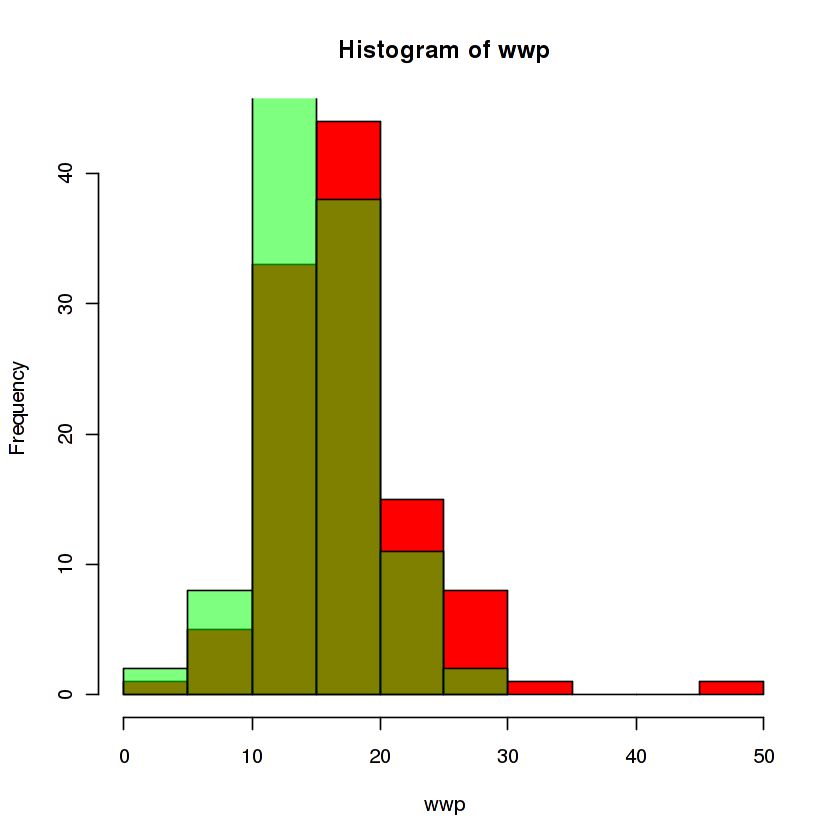

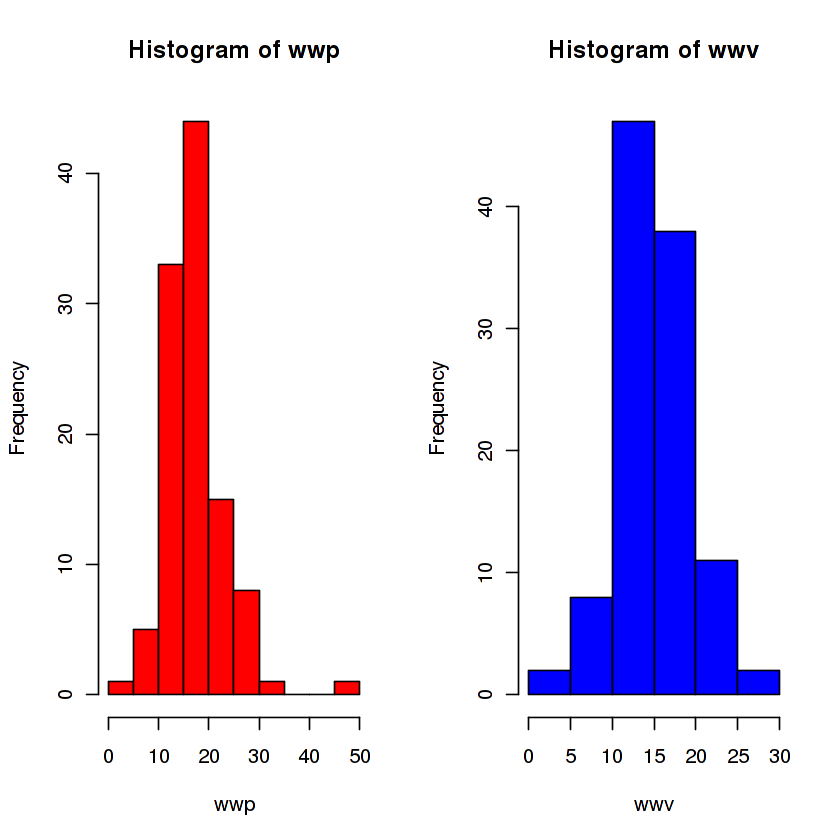

In [25]:
#Last chapter some graphs for the above variables 

#unempoyment for two political parties
vvd2<-gemeente[gemeente$PARTIJ == "VVD", c('PARTIJ','GEM_INKOMEN', 'GEM_WOZ','AUTOBEZIT','WW_PER_100', 'BEVOLKING')]
pvda2<-gemeente[gemeente$PARTIJ == "PvdA", c('PARTIJ','GEM_INKOMEN', 'GEM_WOZ','AUTOBEZIT','WW_PER_100', 'BEVOLKING')]
#overlapping graphs
wwp<-pvda2$WW_PER_100
wwv<-vvd2$WW_PER_100
hist(wwp, col="red")
hist(wwv,  col=rgb(0, 1, 0, 0.5), add=T)
#two in one screen
par(mfrow=c(1,2))
hist(wwp, col="red")
hist(wwv, col="blue")